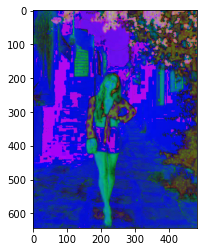

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Read in the image
## TODO: Check out the images directory to see other images you can work with
# And select one!
image_dir = 'C:/Users/bram_/Desktop/ig_example_photos/'
image = cv2.imread(image_dir + 'ig_example_01.PNG', cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)


plt.imshow(image)

In [2]:
print(type(image[0][0][0]))

print(image.max(0))

<class 'numpy.uint8'>
[[178 163 247]
 [178 191 250]
 [178 140 251]
 ...
 [179 172 212]
 [179 155 213]
 [179 170 209]]


In [3]:
def get_colors_in_img(image):
    # Reshape image into a 2D array of pixels and 3 color values (RGB)
    pixel_vals = image.reshape((-1,3))

    # Convert to float type
    pixel_vals = np.float32(pixel_vals)
    # define stopping criteria
    # you can change the number of max iterations for faster convergence!
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

    ## TODO: Select a value for k
    # then perform k-means clustering
    k = 10
    retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    
    # convert data into 8-bit values
    centers = np.uint8(centers)
    segmented_data = centers[labels.flatten()]

    # reshape data into the original image dimensions
    segmented_image = segmented_data.reshape((image.shape))
    labels_reshape = labels.reshape(image.shape[0], image.shape[1])
    
    return centers, segmented_image, labels

In [4]:
centers, segmented_img, _ = get_colors_in_img(image)

(3,)


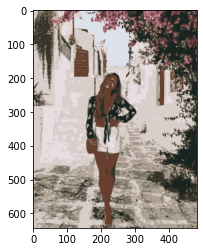

(1, 1, 3)


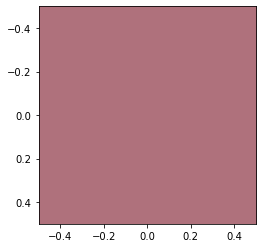

In [5]:
print(centers[0].shape)

reshaped_center = cv2.cvtColor(centers[2].reshape(1,1,3), cv2.COLOR_HSV2RGB)
plt.imshow(cv2.cvtColor(segmented_img, cv2.COLOR_HSV2RGB))
plt.show()
plt.imshow(reshaped_center)
print(reshaped_center.shape)

In [6]:
print(f'image pixels unrowed, has shape:{image.shape[0]}x{image.shape[1]} = {image.shape[0] * image.shape[1]}')

image pixels unrowed, has shape:643x483 = 310569


In [7]:
random_color = np.random.randint(255, size=(10,10,3), dtype='uint8')

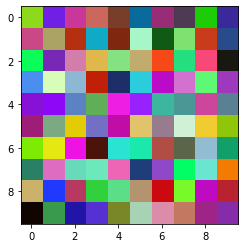

In [8]:
plt.imshow(random_color)

[[[ 74 143 239]]]


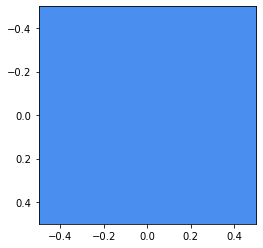

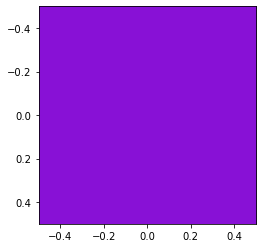

color1 [[[ 74 143 239]]]
color2 [[[136  17 214]]]


In [21]:
color1 = random_color[3][0][:].reshape(1,1,3)
color2 = random_color[4][0][:].reshape(1,1,3)

plt.imshow(color1)
print(color1)
plt.show()
plt.imshow(color2)
plt.show()

print('color1', color1)
print('color2', color2)

In [10]:
import math

In [11]:
def cie76(color1, color2):
    return math.sqrt((color2[0] - color1[0])**2 + (color2[1] - color1[1])**2 + (color2[2] - color1[2])**2)

In [12]:
color1_lab = cv2.cvtColor(color1, cv2.COLOR_RGB2Lab)
color2_lab = cv2.cvtColor(color2, cv2.COLOR_RGB2Lab)
print(color1_lab[0][0])

[151 137  73]


In [13]:
print(color2_lab.reshape(3,))
print(color1_lab.reshape(3,))

[ 99 202  54]
[151 137  73]


In [14]:
print(cie76(color2_lab.astype('float16').reshape(3,), color1_lab.astype('float16').reshape(3,)))

85.38149682454625


In [15]:
def visualize_centers(centers):
    rgb_centers = []
    for i in range(centers.shape[0]):
        rgb_centers.append(cv2.cvtColor(centers[i].reshape(1,1,3), cv2.COLOR_HSV2RGB))
    print(centers.reshape(1,10,3).shape)
    plt.imshow(np.array(rgb_centers).reshape(1,10,3))

(1, 10, 3)


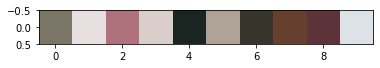

In [16]:
visualize_centers(centers)

In [17]:
def print_pixel_percentage(centers, labels):
    bottom = 0
    for i in range(10):
        pixel_percentage = 100 * (np.count_nonzero(labels == i) / (image.shape[0] * image.shape[1]))
        plt.bar("colors", pixel_percentage, 0.4, bottom=bottom,label=f'color{i}, {round(pixel_percentage, 0)}%', color=cv2.cvtColor(centers[i].reshape(1,1,3), cv2.COLOR_HSV2RGB).reshape(3,) / 255)
        plt.title('Percentage of k cluster colors')
        plt.ylabel('% of pixels')
        bottom += pixel_percentage
    plt.legend()
    plt.show()
    

In [18]:
print_pixel_percentage(centers, labels)
plt.imshow(cv2.cvtColor(segmented_img, cv2.COLOR_HSV2RGB))
plt.show()
plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB))

NameError: name 'labels' is not defined

In [ ]:
pink = np.array([0,0,255])
pink
pink_hsv = cv2.cvtColor(pink.astype('uint8').reshape(1,1,3), cv2.COLOR_RGB2HSV)
print(pink_hsv)
plt.imshow(pink.reshape(1,1,3))


In [ ]:
def get_complementary_color(color):
    comp_hue = (color[0][0][0] * 2) + 180
    print('comp_h', comp_hue)
    if (comp_hue> 360):
        comp_hue -= 360
    print(comp_hue / 2)
    return np.array([comp_hue / 2, color[0][0][1], color[0][0][2]]).reshape(1,1,3)



In [ ]:
comp_color = get_complementary_color(pink_hsv.reshape(1,1,3))
print(comp_color)

In [ ]:
rgb_comp_color = cv2.cvtColor(comp_color.astype('uint8'), cv2.COLOR_HSV2RGB)
plt.imshow(np.array(rgb_comp_color).astype('uint8').reshape(1,1,3))

In [ ]:
def get_triadic_colors(color):
    hues = []
    saturation = color[0][0][1]
    value = color[0][0][2]
    equidistance = ((360 - 3) / 3)
    color1 = color[0][0][0] * 2 + equidistance + 1
    if (color1 > 360):
        color1 -= 360
    hues.append(color1)
    color2 = hues[0] + equidistance + 1
    if (color2 > 360):
        color2 -= 360
    hues.append(color2)
    
    return np.array([[hues[0] / 2, saturation, value], [hues[1] / 2, saturation, value]]).astype('uint8')

In [ ]:
t_colors = get_triadic_colors(np.array([30,255,255]).astype('uint8').reshape(1,1,3))

In [ ]:
t_colors_rgb = cv2.cvtColor(t_colors.reshape(1,2,3), cv2.COLOR_HSV2RGB)
plt.imshow(t_colors_rgb.reshape(1,2,3))

In [ ]:
def calculate_intensity(image):
    plt.imshow(image)
    plt.show()
    image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    h, s, v = cv2.split(image)
    plt.hist(v.reshape(-1), bins=[0, 85, 170, 255])
    plt.title(f"Pixel count for low, mid & high brightness\nVariance:{np.var(v)}")
    plt.show()
    

In [ ]:
image = cv2.imread(image_dir + 'ig_example_05.PNG', cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

calculate_intensity(image)


In [ ]:
for i in range (1,7):
    image = cv2.imread(image_dir + f'ig_example_0{i}.PNG', cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    calculate_intensity(image)